In [5]:
import boto3
import sagemaker

sess = sagemaker.Session()
bucket = sess.default_bucket()
role = sagemaker.get_execution_role()
region = boto3.Session().region_name

In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [8]:
#from pyathena import connect

In [9]:
#conn = connect(region_name=region, s3_staging_dir=s3_staging_dir)

In [10]:
la_comp_df = pd.read_csv('s3://508-team4/data/la_compensation/la_compensation.csv')
sf_comp_df = pd.read_csv('s3://508-team4/data/sf_compensation/sf_compensation.csv')
sj_comp_df = pd.read_csv('s3://508-team4/data/sj_compensation/sj_compensation.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (0,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### San Jose

In [11]:
sj_comp_df.head(2)

,name,department,job_title,total_cash,base_salary,overtime,health,retired,year,city_id,irregular_cash,retirement,other_benefits,total_benefits,total_compensation
0,Bustillos Steven D,Police,Police Sergeant,286137.69,90888.00,89867.88,13640.5,Yes,2013,1,105381.81,74429.71,0.0,88070.21,374207.90
1,Figone Debra J,City Manager,City Manager U,248564.84,227975.02,NaN,15166.0,Yes,2013,1,20589.82,151550.08,0.0,166716.08,415280.92


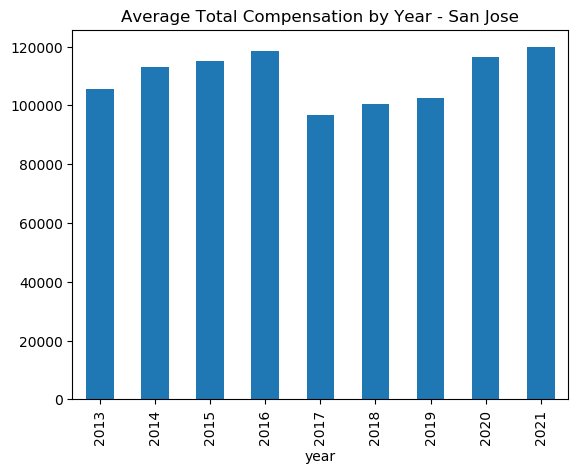

In [12]:
cash_over_time = sj_comp_df.groupby('year')['total_compensation'].mean().plot.bar()
plt.title('Average Total Compensation by Year - San Jose')
plt.show()

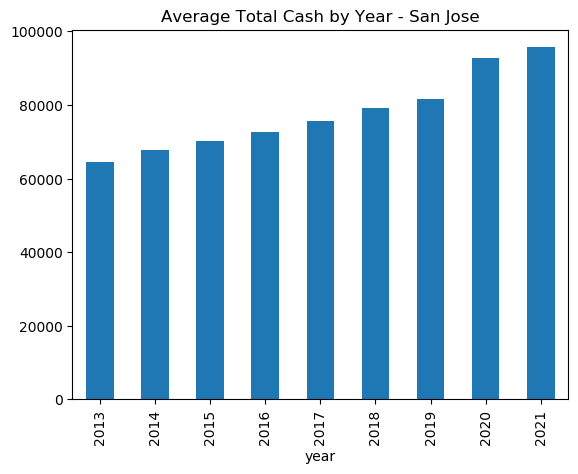

In [13]:
cash_over_time = sj_comp_df.groupby('year')['total_cash'].mean().plot.bar()
plt.title('Average Total Cash by Year - San Jose')
plt.show()

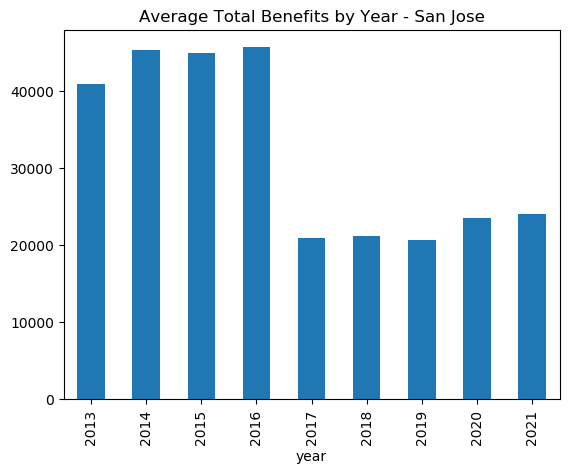

In [14]:
benefits_over_time = sj_comp_df.groupby('year')['total_benefits'].mean().plot.bar()
plt.title('Average Total Benefits by Year - San Jose')
plt.show()

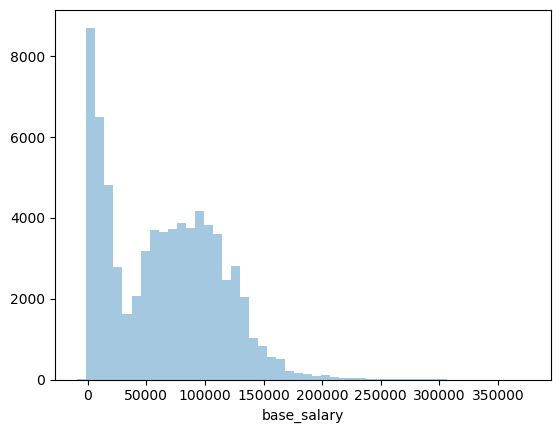

In [15]:
sns.distplot(a=sj_comp_df['base_salary'],kde=False)
plt.show()

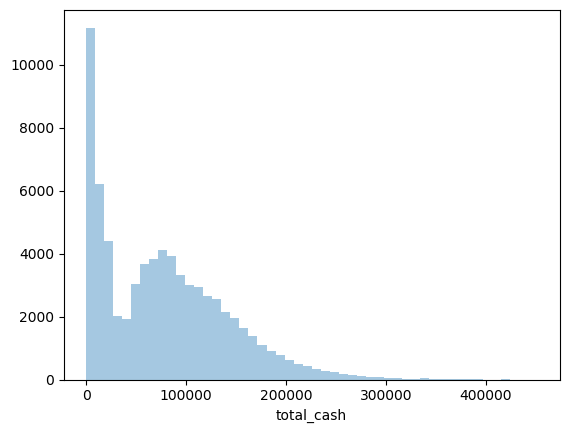

In [16]:
sns.distplot(a=sj_comp_df['total_cash'],kde=False)
plt.show()

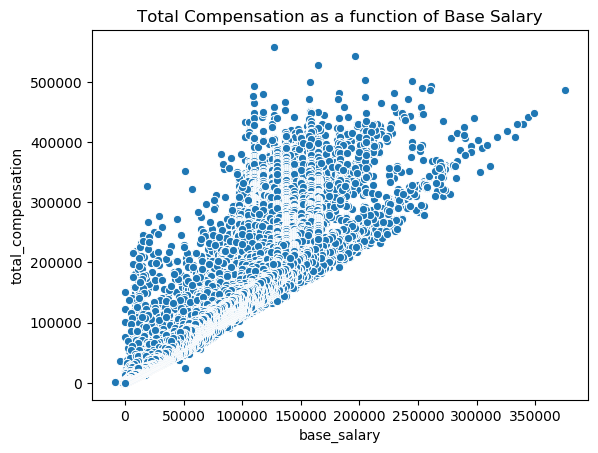

In [17]:
sns.scatterplot(x=sj_comp_df['base_salary'], 
                y=sj_comp_df['total_compensation'])
plt.title("Total Compensation as a function of Base Salary")
plt.show()

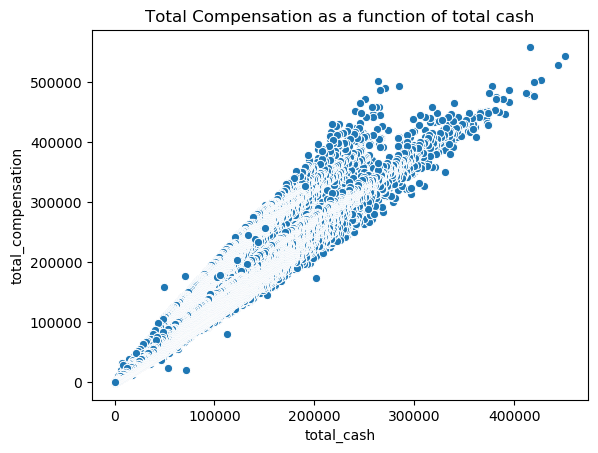

In [18]:
sns.scatterplot(y=sj_comp_df['total_compensation'], 
                x=sj_comp_df['total_cash'])
plt.title("Total Compensation as a function of total cash")
plt.show()

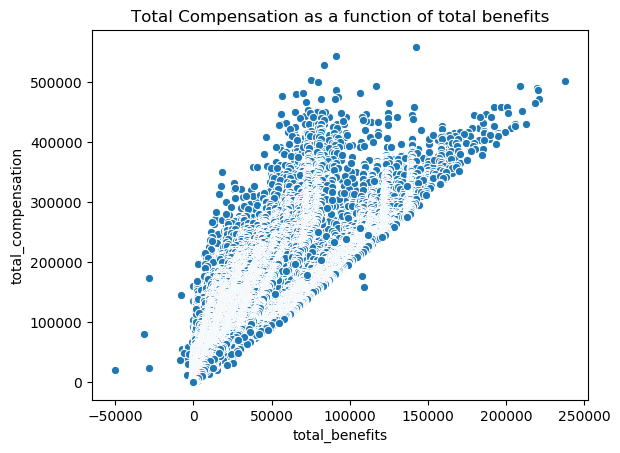

In [19]:
sns.scatterplot(y=sj_comp_df['total_compensation'], 
                x=sj_comp_df['total_benefits'])
plt.title("Total Compensation as a function of total benefits")
plt.show()

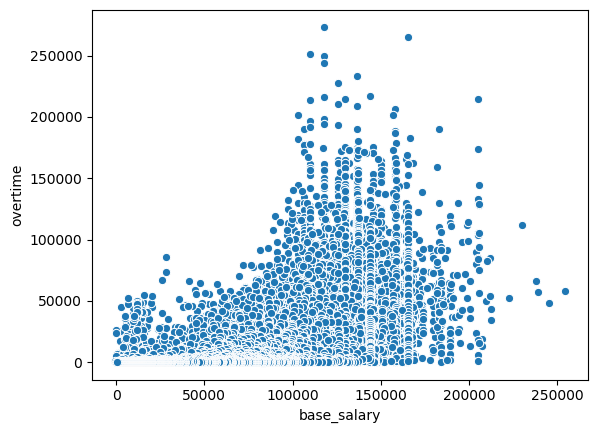

In [20]:
sns.scatterplot(x=sj_comp_df['base_salary'], 
                y=sj_comp_df['overtime'])
plt.show()

### Los Angeles

In [23]:
la_comp_df.head(2)

,record_nbr,year,department_no,department,job_class_pgrade,job_title,employment_type,job_status,mou,mou_title,base_salary,overtime,irregular_cash,total_cash,retirement,health,gender,ethnicity,city_id,total_benefits,total_compensation,other_benefits
0,303030303632,2017,98,WATER AND POWER,3156-5,CUSTODIAN,FULL_TIME,ACTIVE,8,OPERATING MAINTENANCE AND SERVICE UNIT,55725.24,4785.05,2021.84,62532.13,3678.0,23508.9,FEMALE,HISPANIC,3,27186.9,89719.03,NaN
1,3030303036,2017,98,WATER AND POWER,9105-5,UTILITY ADMINISTRATOR,FULL_TIME,ACTIVE,M,MANAGEMENT EMPLOYEES UNIT,139174.88,16340.50,6170.49,161685.87,9186.0,23508.9,FEMALE,ASIAN AMERICAN,3,32694.9,194380.77,NaN


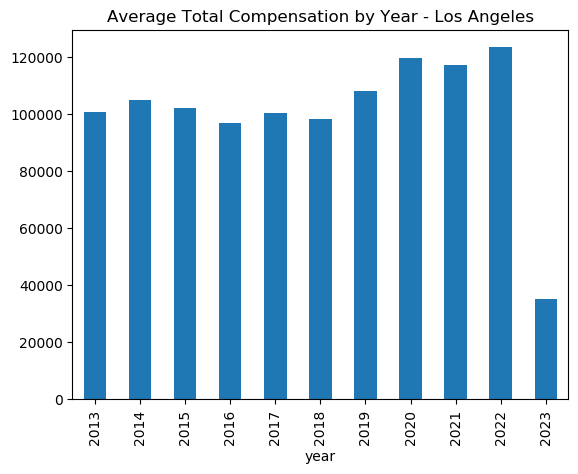

In [25]:
cash_over_time = la_comp_df.groupby('year')['total_compensation'].mean().plot.bar()
plt.title('Average Total Compensation by Year - Los Angeles')
plt.show()

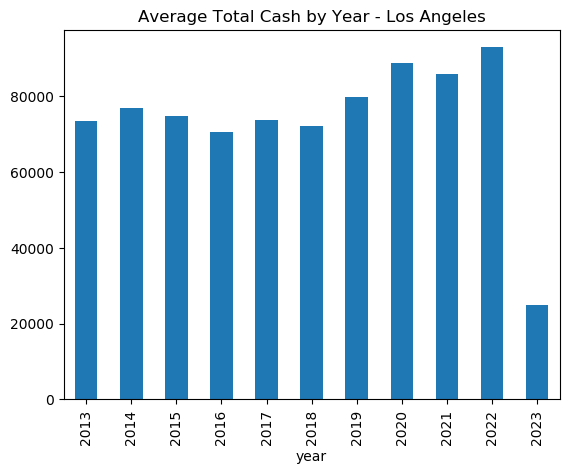

In [26]:
cash_over_time = la_comp_df.groupby('year')['total_cash'].mean().plot.bar()
plt.title('Average Total Cash by Year - Los Angeles')
plt.show()

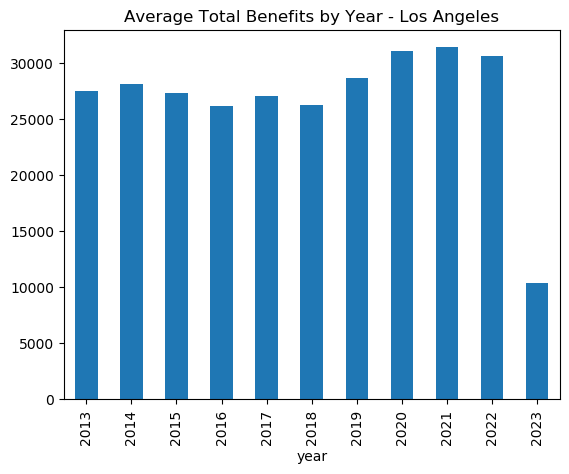

In [27]:
benefits_over_time = la_comp_df.groupby('year')['total_benefits'].mean().plot.bar()
plt.title('Average Total Benefits by Year - Los Angeles')
plt.show()

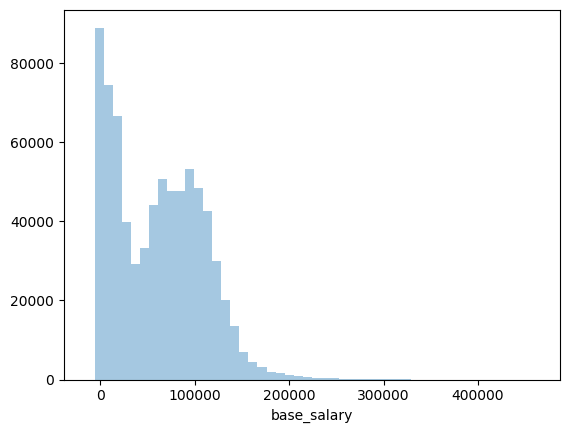

In [28]:
sns.distplot(a=la_comp_df['base_salary'],kde=False)
plt.show()

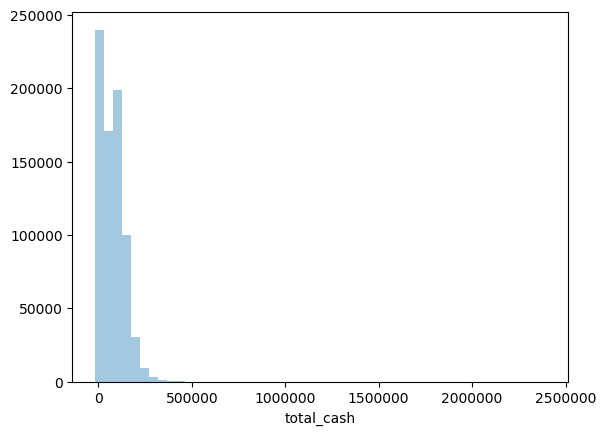

In [29]:
sns.distplot(a=la_comp_df['total_cash'],kde=False)
plt.show()

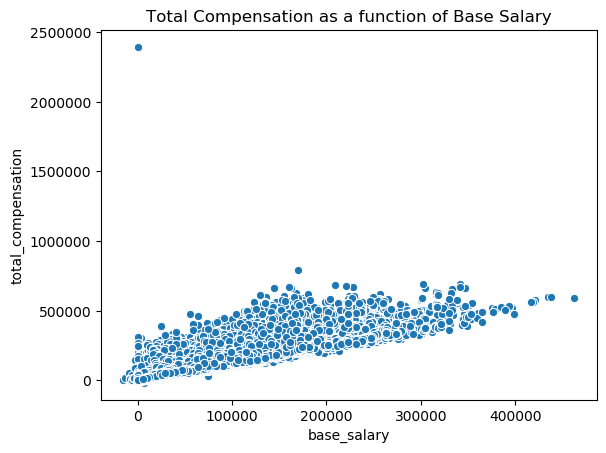

In [30]:
sns.scatterplot(x=la_comp_df['base_salary'], 
                y=la_comp_df['total_compensation'])
plt.title("Total Compensation as a function of Base Salary")
plt.show()

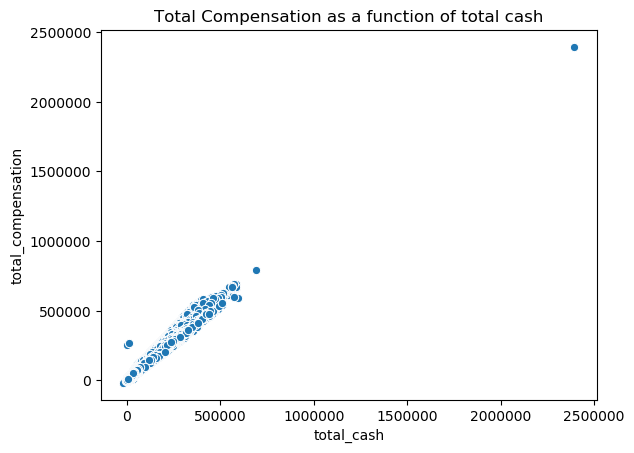

In [31]:
sns.scatterplot(y=la_comp_df['total_compensation'], 
                x=la_comp_df['total_cash'])
plt.title("Total Compensation as a function of total cash")
plt.show()

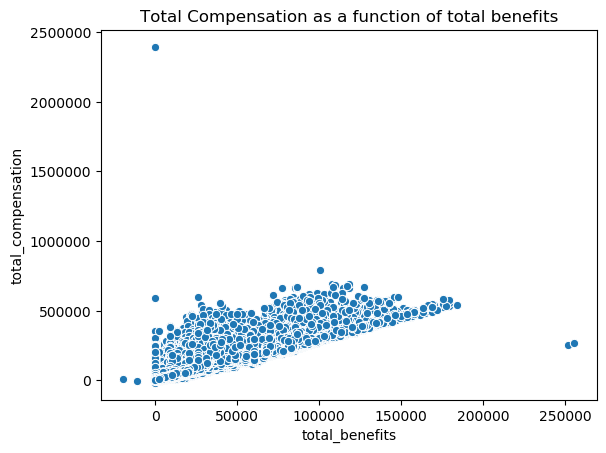

In [32]:
sns.scatterplot(y=la_comp_df['total_compensation'], 
                x=la_comp_df['total_benefits'])
plt.title("Total Compensation as a function of total benefits")
plt.show()

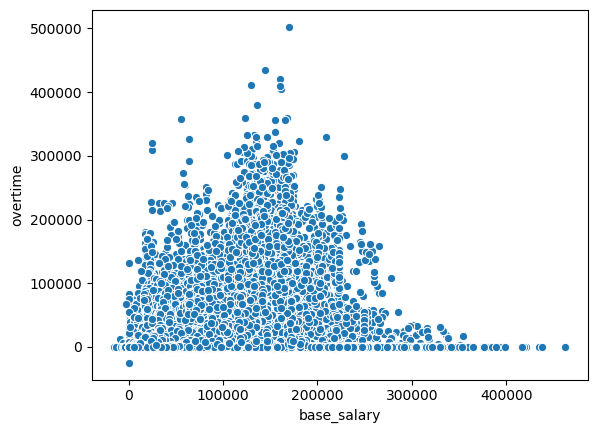

In [33]:
sns.scatterplot(x=la_comp_df['base_salary'], 
                y=la_comp_df['overtime'])
plt.show()

### San Francisco

In [34]:
sf_comp_df.head(2)

,organization_group_code,job_family_code,job_code,year_type,year,organization_group,department_code,department,union_code,union,job_family,job,employee_identifier,salaries,overtime,other_salaries,total_salary,retirement,health_and_dental,other_benefits,total_benefits,total_compensation,city_id
0,3,1400,1404,Fiscal,2019,Human Welfare & Neighborhood Development,HSA,Human Services,790.0,SEIU Local 1021 Misc,Clerical Secretarial & Steno,Clerk,37486688,60720.01,0.0,0.0,60720.01,13653.2,14733.76,4904.34,33291.30,94011.31,2
1,3,9700,9703,Fiscal,2019,Human Welfare & Neighborhood Development,HSA,Human Services,535.0,SEIU Local 1021 Misc,Community Development,HSA Emp & Training Spec II,39646203,91677.00,0.0,0.0,91677.00,17524.2,14733.76,7411.13,39669.09,131346.09,2


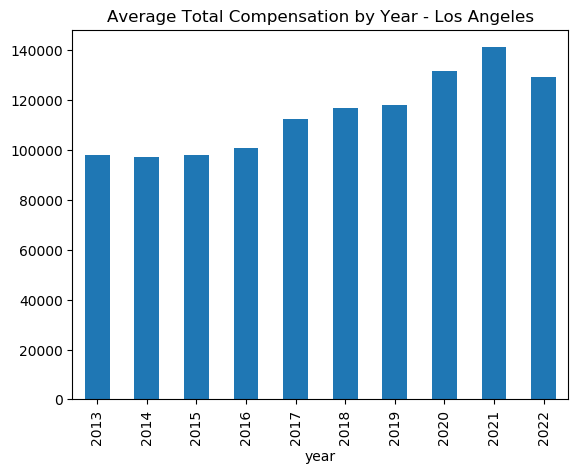

In [35]:
cash_over_time = sf_comp_df.groupby('year')['total_compensation'].mean().plot.bar()
plt.title('Average Total Compensation by Year - Los Angeles')
plt.show()

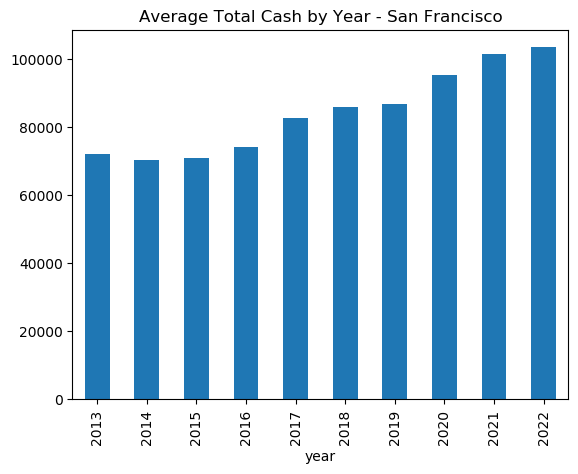

In [51]:
cash_over_time = sf_comp_df.groupby('year')['total_salary'].mean().plot.bar()
plt.title('Average Total Cash by Year - San Francisco')
plt.show()

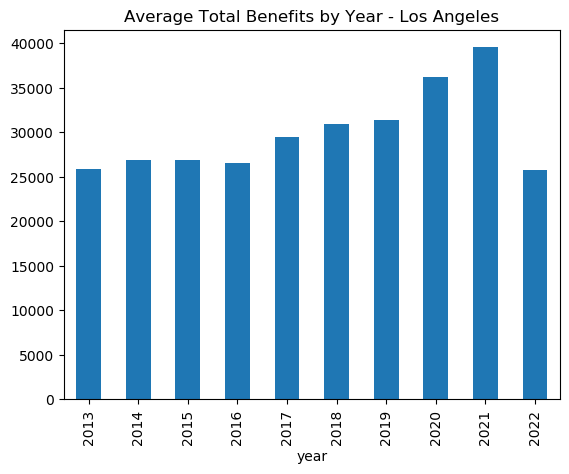

In [38]:
benefits_over_time = sf_comp_df.groupby('year')['total_benefits'].mean().plot.bar()
plt.title('Average Total Benefits by Year - Los Angeles')
plt.show()

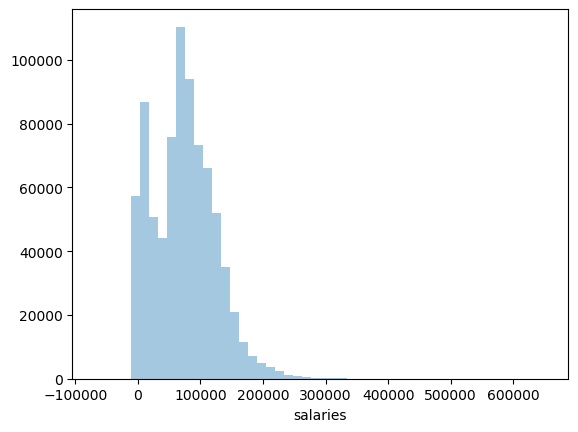

In [40]:
sns.distplot(a=sf_comp_df['salaries'],kde=False)
plt.show()

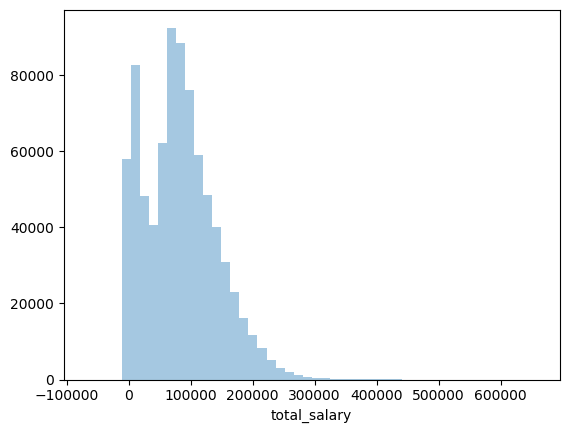

In [43]:
sns.distplot(a=sf_comp_df['total_salary'],kde=False)
plt.show()

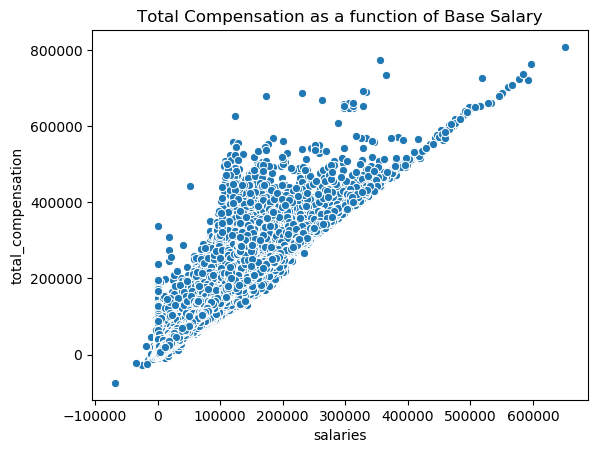

In [44]:
sns.scatterplot(x=sf_comp_df['salaries'], 
                y=sf_comp_df['total_compensation'])
plt.title("Total Compensation as a function of Base Salary")
plt.show()

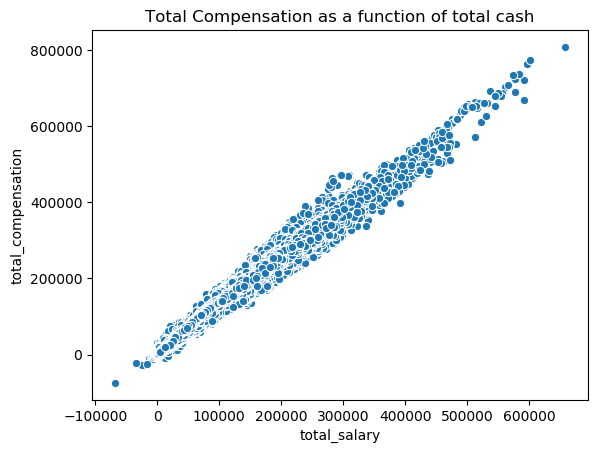

In [47]:
sns.scatterplot(y=sf_comp_df['total_compensation'], 
                x=sf_comp_df['total_salary'])
plt.title("Total Compensation as a function of total cash")
plt.show()

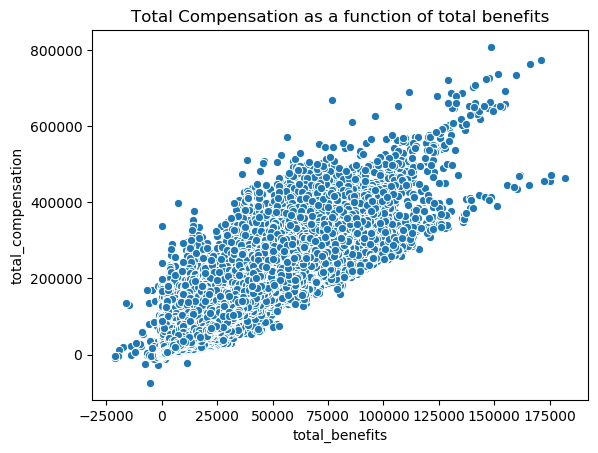

In [49]:
sns.scatterplot(y=sf_comp_df['total_compensation'], 
                x=sf_comp_df['total_benefits'])
plt.title("Total Compensation as a function of total benefits")
plt.show()

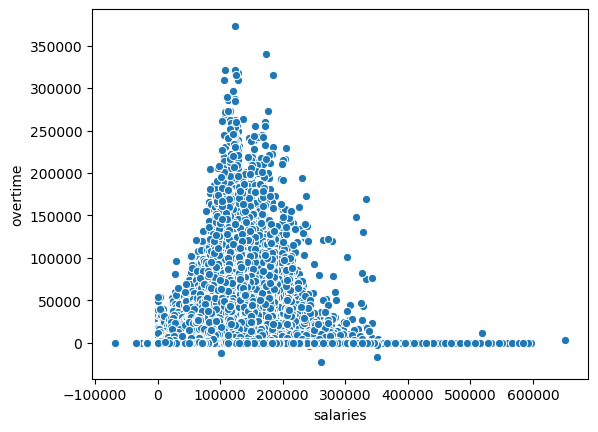

In [50]:
sns.scatterplot(x=sf_comp_df['salaries'], 
                y=sf_comp_df['overtime'])
plt.show()